# Black Friday Dataset 

### Cleaning and preparing the data for model training

dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv

In [1]:
#importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Problem Statement
Build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
#load train dataset
df_train=pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_train.shape

(550068, 12)

In [4]:
#load test data
df_test=pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
#merge both train and test DataFrame/dataset
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
df_test.shape

(233599, 11)

In [7]:
#info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [8]:
#describe
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
#drop feature User_ID and Product_ID as they are not useful
df.drop(['User_ID'],axis=1,inplace=True)
df.drop(['Product_ID'],axis=1,inplace=True)

In [10]:
#hanndling categorical feature Gender
#mapping
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
#Handling categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
#mapping
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [13]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
#handling categorical feature City_category
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [15]:
#merge df_city and df
df=pd.concat([df,df_city],axis=1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [16]:
#drop feature City Category
df.drop('City_Category',axis=1,inplace=True)

In [17]:
#Check Missing Values
df.isna().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [18]:
df_test.shape

(233599, 11)

the missing values in Purchase are from test dataset

In [19]:
#replacing missing values of Product_Category_2
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [20]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [21]:
df['Product_Category_2'].mode()[0]

8.0

In [22]:
#Replace with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [23]:
df['Product_Category_2'].isnull().sum()

0

In [24]:
#Replacing missing values with mode for Product_Category_3
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [25]:
df.isna().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [26]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [27]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  uint8  
 10  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(1), uint8(2)
memory usage: 55.3+ MB


In [29]:
#coverting objects into int
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int64')
df['B']=df['B'].astype('int64')
df['C']=df['C'].astype('int64')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int64  
 10  C                           783667 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 65.8 MB


### Visualisation

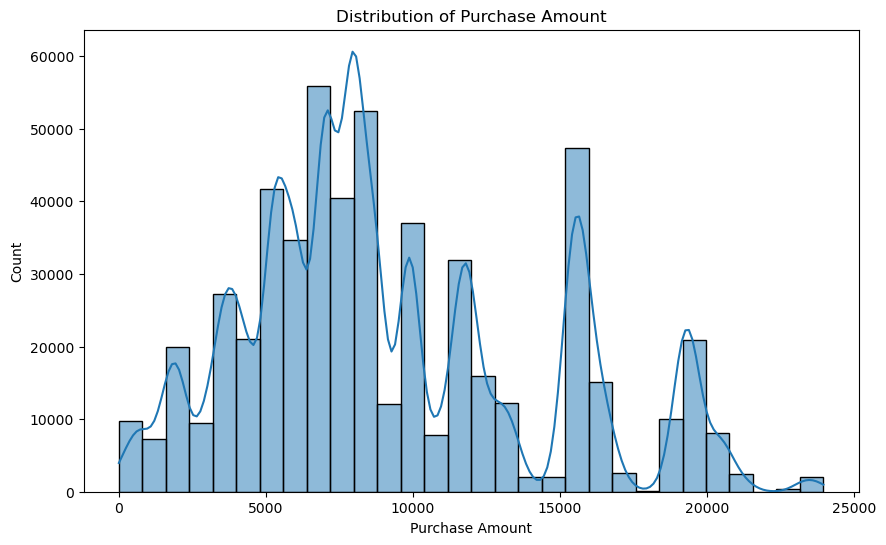

In [31]:
#histogram of the purchase amount
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', bins=30, kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Count')
plt.show();

1. seems like almost Normal Distribution

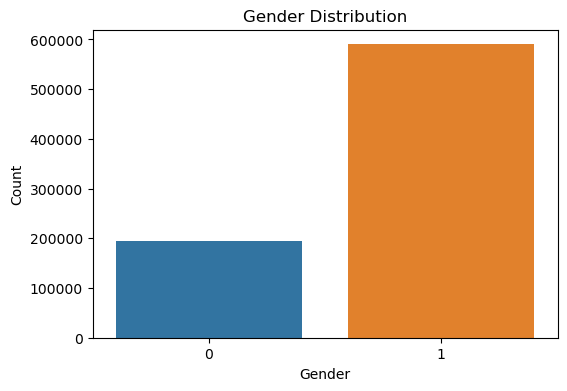

In [32]:
#countplot of gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

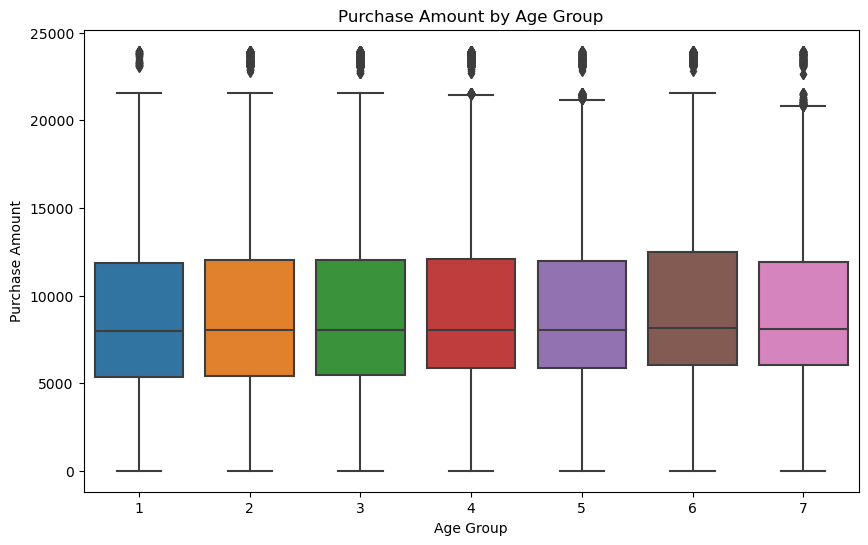

In [33]:
#boxplot of purchase amount by age group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age', y='Purchase')
plt.title('Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show();

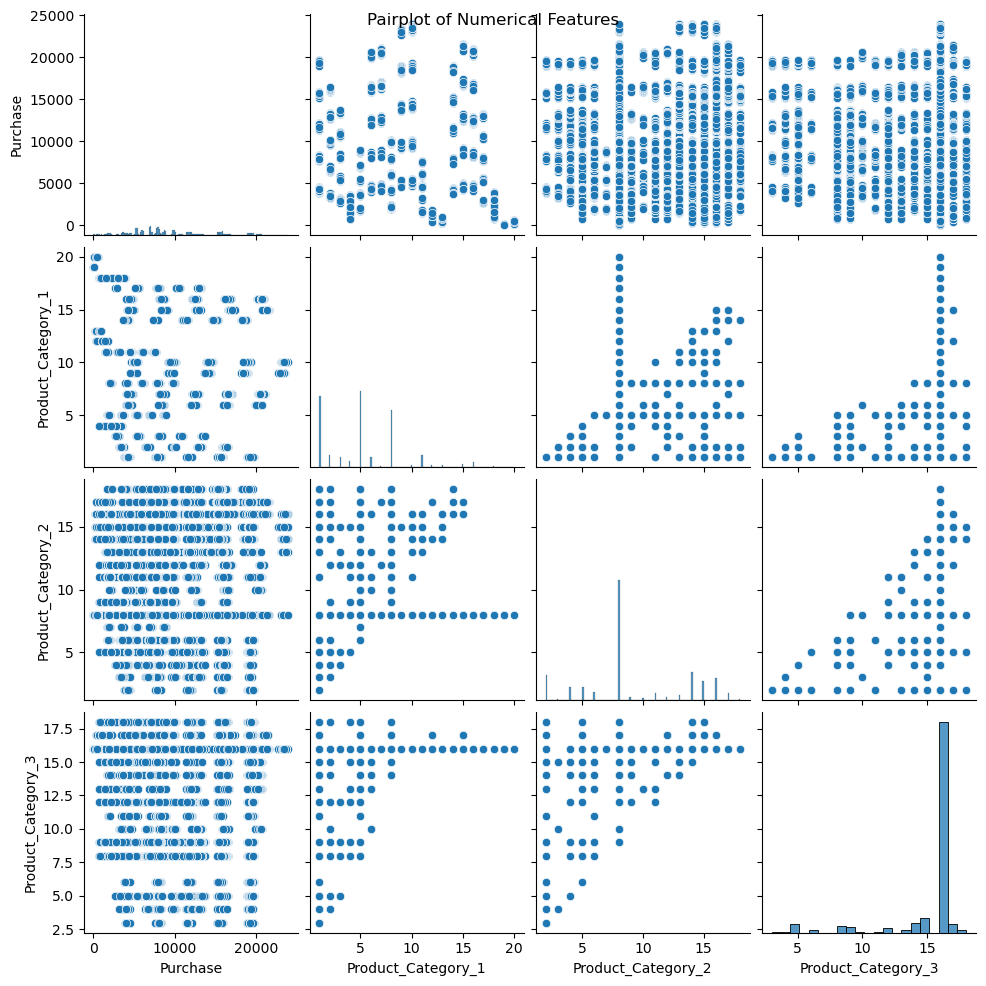

In [34]:
#pairplot for numerical features
numerical_cols = ['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairplot of Numerical Features')
plt.show();

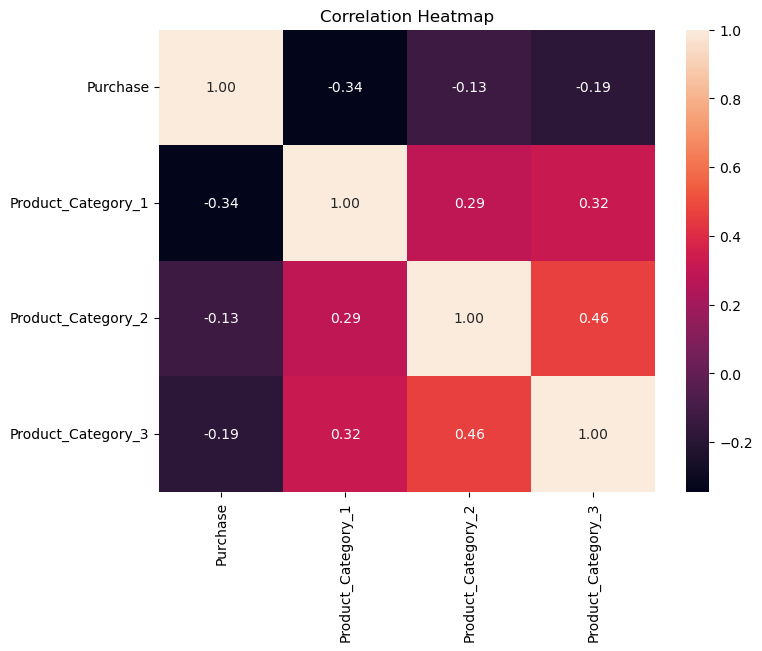

In [35]:
#correlation heatmap
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show();

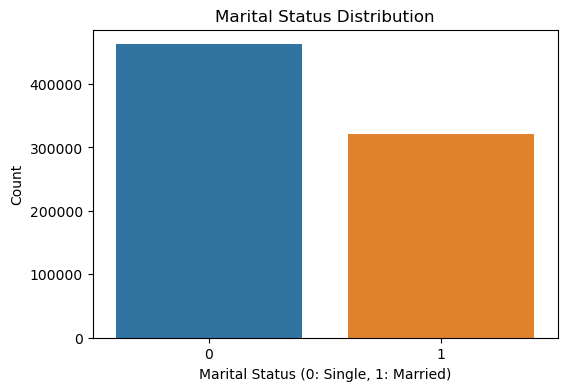

In [36]:
#countplot of marital status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Marital_Status')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status (0: Single, 1: Married)')
plt.ylabel('Count')
plt.show();

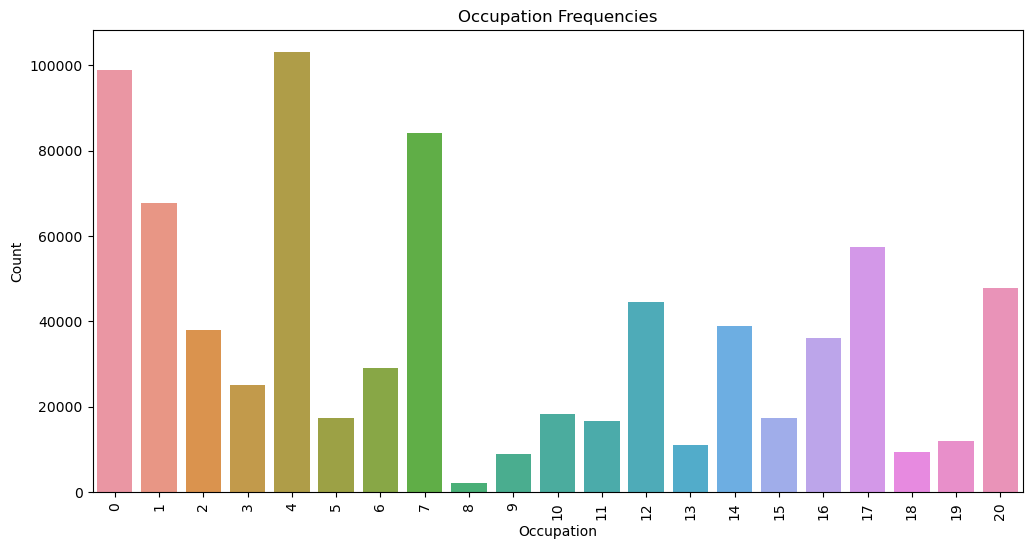

In [37]:
#barplot of occupation frequencies
plt.figure(figsize=(12, 6))
occupation_counts = df['Occupation'].value_counts().sort_index()
sns.barplot(x=occupation_counts.index, y=occupation_counts.values)
plt.title('Occupation Frequencies')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show();

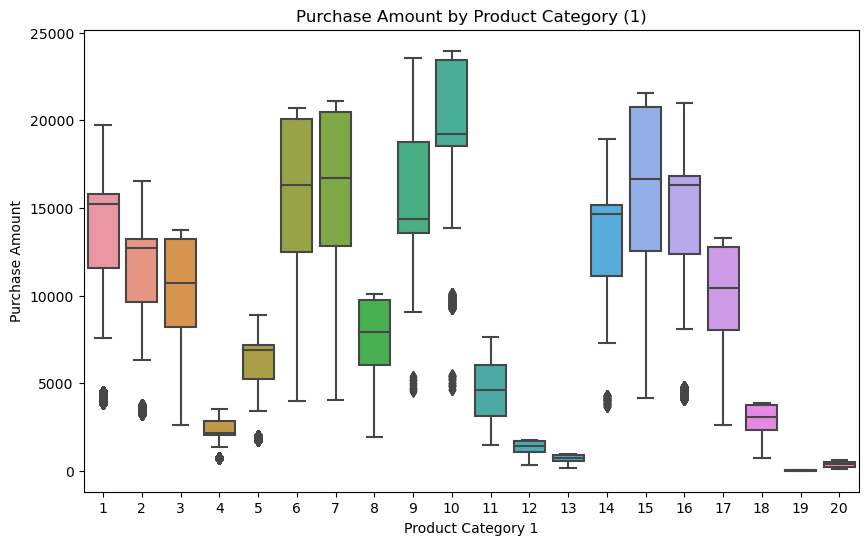

In [38]:
#boxplot of purchase amount by product category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product_Category_1', y='Purchase')
plt.title('Purchase Amount by Product Category (1)')
plt.xlabel('Product Category 1')
plt.ylabel('Purchase Amount')
plt.show();

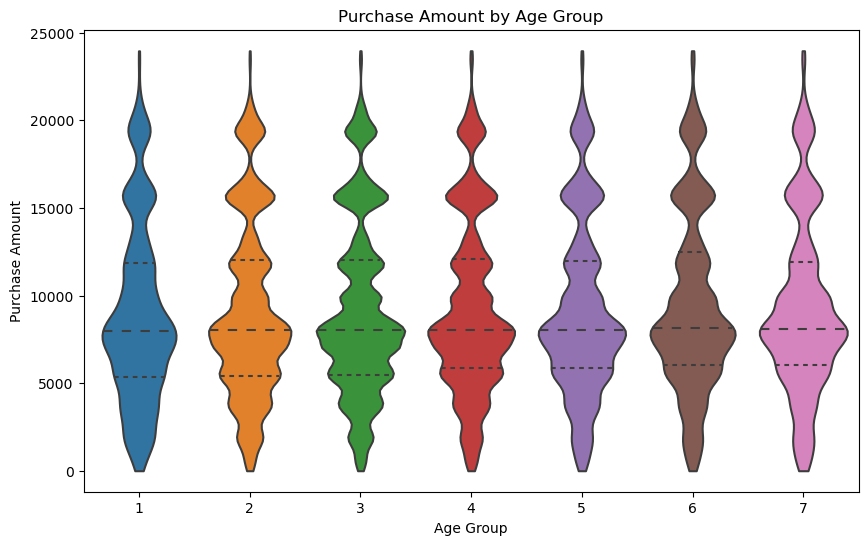

In [39]:
#violinplot of purchase amount by age group
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Age', y='Purchase', inner='quart', cut=0)
plt.title('Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show();

<AxesSubplot:>

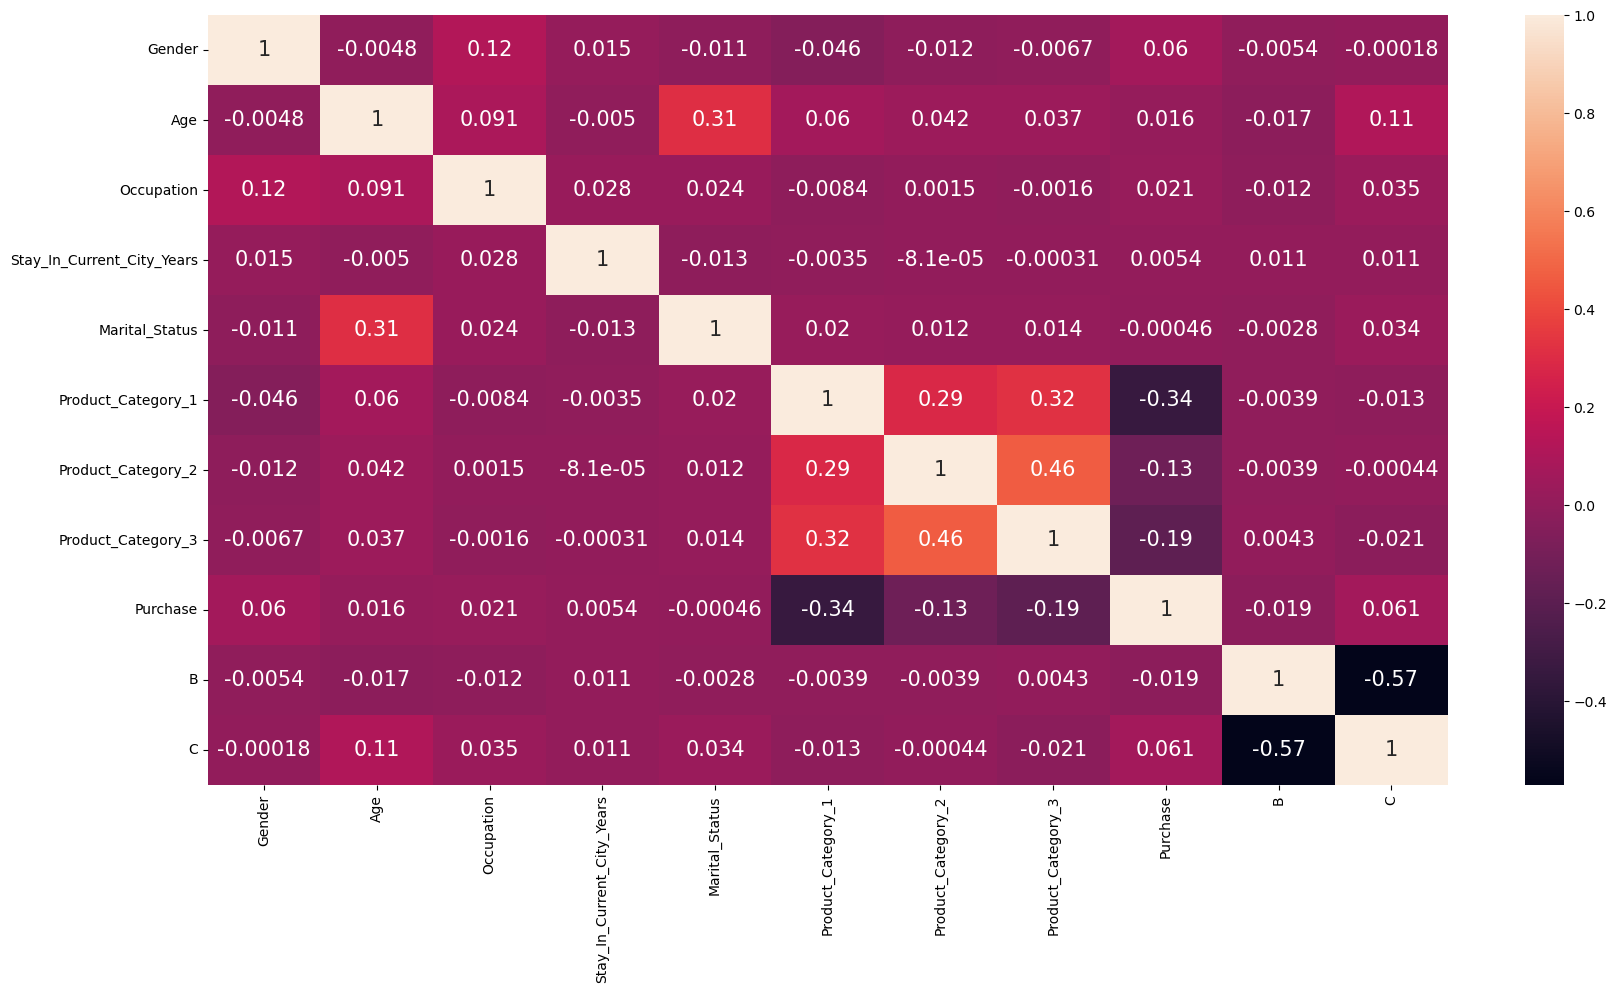

In [40]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True,annot_kws={'size': 15})

## Observations
1. Boxplot showing outliers.
2. More purchase is done by male than female.

In [41]:
#outlier detection in Purchase
outliers=[]

def detect_outliers(data):
    threshold=3 #3rd std dev
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
            
    return outliers

In [42]:
purchase_outliers = detect_outliers(df['Purchase'])

In [43]:
# Creating a new DataFrame without outliers
df_no_outliers = df[~df['Purchase'].isin(purchase_outliers)]

In [44]:
df_no_outliers

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
783662,0,3,15,4,1,8,8.0,16.0,NaN,1,0
783663,0,3,15,4,1,5,8.0,16.0,NaN,1,0
783664,0,3,15,4,1,1,5.0,12.0,NaN,1,0
783665,0,5,1,4,0,10,16.0,16.0,NaN,0,1


## Feture Scaling

In [45]:
#seperating train data and test data
df_test=df_no_outliers[df_no_outliers['Purchase'].isnull()]
df_train=df_no_outliers[~df_no_outliers['Purchase'].isnull()]

In [46]:
df_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [47]:
df_test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
550068,1,5,7,2,1,1,11.0,16.0,NaN,1,0
550069,1,3,17,0,0,3,5.0,16.0,NaN,0,1
550070,0,4,1,4,1,5,14.0,16.0,NaN,1,0
550071,0,4,1,4,1,4,9.0,16.0,NaN,1,0
550072,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [48]:
X=df_train.drop('Purchase',axis=1)

In [49]:
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1


In [50]:
X.shape

(550068, 10)

In [51]:
y=df_train['Purchase']

In [52]:
y.shape

(550068,)

In [53]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33, 
                                                    random_state=42)

In [54]:
#feature Scaling 
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Model Building

In [55]:
#creting empty dict to store accuracy values with model names
r2_dict = {}
mse_dict = {}
#list of models
models = [
    ('linear regression',LinearRegression()),
    ('ridge',Ridge(alpha=0.1)),
    ('lasso',Lasso(alpha=0.1)),
    ('Decision Tree',DecisionTreeRegressor()),
    ('random forest',RandomForestRegressor(n_estimators=100,random_state=42)),
    ('xgboost',XGBRegressor())
]


#looping through models
for name, model in tqdm(models,desc="Training Models"):
    #model training
    model.fit(X_train, y_train)
    #prediction
    y_pred = model.predict(X_test)
    #evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print("\033[1m" + name + "\033[0m")
    print(f'mse of model {name} is {mse}')
    print(f'r2 score for {name} is {r2}')
    print('****************************************')
    print('                                        ')
    mse_dict[name]=mse
    r2_dict[name] = r2

Training Models:  50%|█████████████████████████████████▌                                 | 3/6 [00:00<00:00, 10.53it/s]

linear regression
mse of model linear regression is 21939163.321535416
r2 score for linear regression is 0.1294876856071241
****************************************
                                        
ridge
mse of model ridge is 21939163.296377074
r2 score for ridge is 0.12948768660536847
****************************************
                                        
lasso
mse of model lasso is 21939162.858729605
r2 score for lasso is 0.12948770397054798
****************************************
                                        
Decision Tree
mse of model Decision Tree is 11123117.215112897
r2 score for Decision Tree is 0.5586517877513336
****************************************
                                        


Training Models:  83%|███████████████████████████████████████████████████████▊           | 5/6 [01:23<00:21, 21.35s/it]

random forest
mse of model random forest is 9342676.67755661
r2 score for random forest is 0.6292969345270836
****************************************
                                        


Training Models: 100%|███████████████████████████████████████████████████████████████████| 6/6 [01:25<00:00, 14.28s/it]

xgboost
mse of model xgboost is 8395095.204795448
r2 score for xgboost is 0.6668955124144831
****************************************
                                        


# Conclusions
1. "Linear Regression," "Ridge," and "Lasso" have higher MSE values and relatively low R2 scores, indicating that they may not provide the best predictive performance in this context.
2. "XGBoost" has the lowest MSE, indicating better predictive performance in terms of minimizing squared errors.
3. "Random Forest" and "XGBoost" perform well in terms of both MSE and R2 score. "Random Forest" has a higher R2 score, suggesting that it explains a larger proportion of the variance in the data.
4. "Decision Tree" performs reasonably well and offers some interpretability, but it has a higher MSE compared to "Random Forest" and "XGBoost."